In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('monthly-milk-production-pounds.csv')

In [3]:
df.dropna(axis=0, inplace=True)

In [4]:
df.head(5)

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.rename(columns = {'Month' : 'ds', 'Monthly milk production: pounds per cow. Jan 62 ? Dec 75' : 'y'}, inplace=True)

In [6]:
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

<AxesSubplot:>

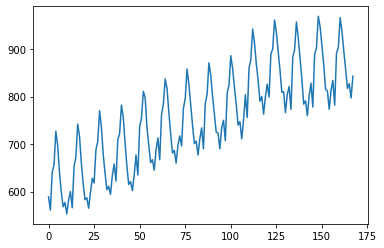

In [8]:
df['y'].plot()

In [9]:
df['y'] = df['y'] - df['y'].shift(1)

<AxesSubplot:>

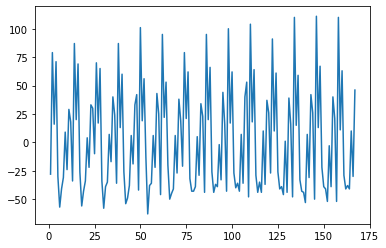

In [11]:
df['y'].plot()

In [12]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
future_dates = model.make_future_dataframe(periods = 365)
prediction = model.predict(future_dates)
prediction.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,2.042913,17.219914,35.934075,2.042913,2.042913,24.994813,24.994813,24.994813,24.994813,24.994813,24.994813,0.0,0.0,0.0,27.037726
1,1962-02-01,2.041199,-47.954995,-28.688862,2.041199,2.041199,-40.255677,-40.255677,-40.255677,-40.255677,-40.255677,-40.255677,0.0,0.0,0.0,-38.214478
2,1962-03-01,2.039650,85.759905,103.792159,2.039650,2.039650,93.019984,93.019984,93.019984,93.019984,93.019984,93.019984,0.0,0.0,0.0,95.059634
3,1962-04-01,2.037935,6.559090,26.172474,2.037935,2.037935,14.324889,14.324889,14.324889,14.324889,14.324889,14.324889,0.0,0.0,0.0,16.362824
4,1962-05-01,2.036276,53.974047,72.569846,2.036276,2.036276,60.541982,60.541982,60.541982,60.541982,60.541982,60.541982,0.0,0.0,0.0,62.578257


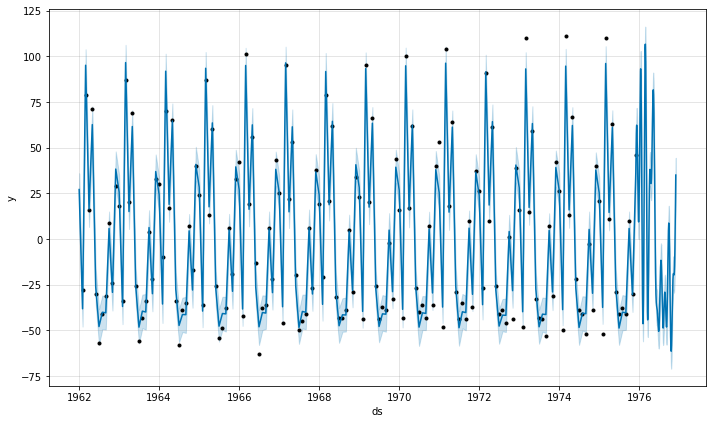

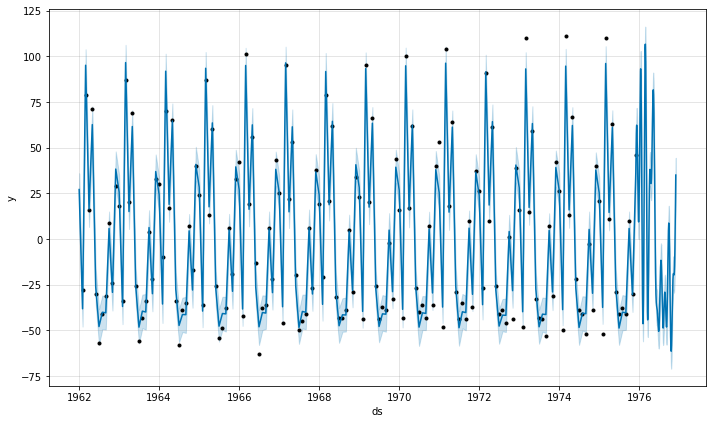

In [75]:
model.plot(prediction)